# Implementation of Support Vector Machine (SVM) Based on Decision Tree (DT) Extracted Features

There are several techniques that can be combined with decision tree models for intrusion detection. Some common techniques are Random Forest, Gradient Booting, Neural Networks, Bayesian Networks and others but in this work we are to be focusing in the Support Vector Machine techniques and compare them with others metrics such as Linear Regression, KNN, Grid Search and Random Forest. 

# DT-SVM Method Description:

In this approach, the individual decision trees and SVMs are trained on different subsets of the training data, and their outputs are combined using a majority voting scheme. This can improve the overall accuracy and robustness of the model, as it reduces the impact of any individual decision tree or SVM that may be overfitting or biased.

## First Step: Data preprocessing

The initial step is to preprocess the data so that it may be used by the decision tree algorithm. Filtering the data, handling with missing values, and converting categorical data to numerical data are all frequent instances.


## Second Step: Feature Selection

Following that, feature selection may be used to determine the most significant aspects for the decision tree. This simplifies the model and reduces overfitting.


## Third Step: Model Development

Tree development: After the data has been preprocessed and the features have been chosen, the decision tree algorithm may be used to construct the tree. This implies recursively separating the data based on the most significant elements. Finally, tree pruning can be performed to simplify the tree and improve its accuracy. This involves removing unnecessary branches from the tree.

Support Vector Machine(SVM): This one focus on the performance of an SVM is highly dependent on the choice of hyperparameters. These parameters can be tuned using cross-validation to find the optimal values for the given data. The selection of hyperparameters has a significant impact on the performance of an SVM. Cross-validation may be used to tweak these parameters to discover the best values for the provided data.

Tunning Hyperparameters: In this step I try tuning the hyperparameters of the Decision tree and SVM models using cross-validation to find the best combination of max_depth, max_features, and regularization parameters for the SVM to get the best performance of this implementation.


## Dataset

NSL-KDD is a benchmark dataset that is often used to assess intrusion detection systems. It is an enhanced version of the original KDD Cup 1999 dataset, which had a number of restrictions and problems. The NSL-KDD dataset was developed to overcome these limitations and provide a more realistic and representative dataset for intrusion detection research.


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

# Dataset Loading

In [4]:
Trained_Data = pd.read_csv(r"C:\Users\Mba\Desktop\Quintana_Code/KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv(r"C:\Users\Mba\Desktop\Quintana_Code/KDDTest+.txt" , sep = "," , encoding = 'utf-8')

In [5]:
#!pip install mlxtend
#Test2
#Trained_Data = pd.read_csv("/Users/mba/Documents/Networking/Network-Intrusion-Detection-master/KDDTrain+_2.csv" , sep = "," , encoding = 'utf-8')
#Tested_Data = pd.read_csv("/Users/mba/Documents/Networking/Network-Intrusion-Detection-master/KDDTest+_2.csv" , sep = "," , encoding = 'utf-8')

# Exploring Data

In [6]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [7]:
Trained_Data.columns = Columns
Tested_Data.columns = Columns

In [8]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [9]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [10]:
Tested_Data.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [11]:
Trained_Data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [12]:
Tested_Data.max()

duration                          57715
protocol_type                       udp
service                           whois
flag                                 SH
src_bytes                      62825648
dst_bytes                       1345927
land                                  1
wrong_fragment                        3
urgent                                3
hot                                 101
num_failed_logins                     4
logged_in                             1
num_compromised                     796
root_shell                            1
su_attempted                          2
num_root                            878
num_file_creations                  100
num_shells                            5
num_access_files                      4
num_outbound_cmds                     0
is_host_login                         1
is_guest_login                        1
count                               511
srv_count                           511
serror_rate                         1.0


In [13]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'teardrop', 'satan', 'guess_passwd', 'loadmodule', 'land', 'rootkit', 'warezmaster', 'nmap', 'pod', 'ftp_write', 'phf', 'normal', 'multihop', 'spy', 'imap', 'ipsweep', 'portsweep', 'smurf', 'buffer_overflow', 'warezclient', 'neptune', 'back', 'perl'} 

In [14]:
Trained_Data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [15]:
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)

Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack

In [16]:
Trained_Data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [17]:
#Trained_Data.isnull().sum()
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [18]:
Trained_Data.duplicated().sum()
Tested_Data.duplicated().sum()

0

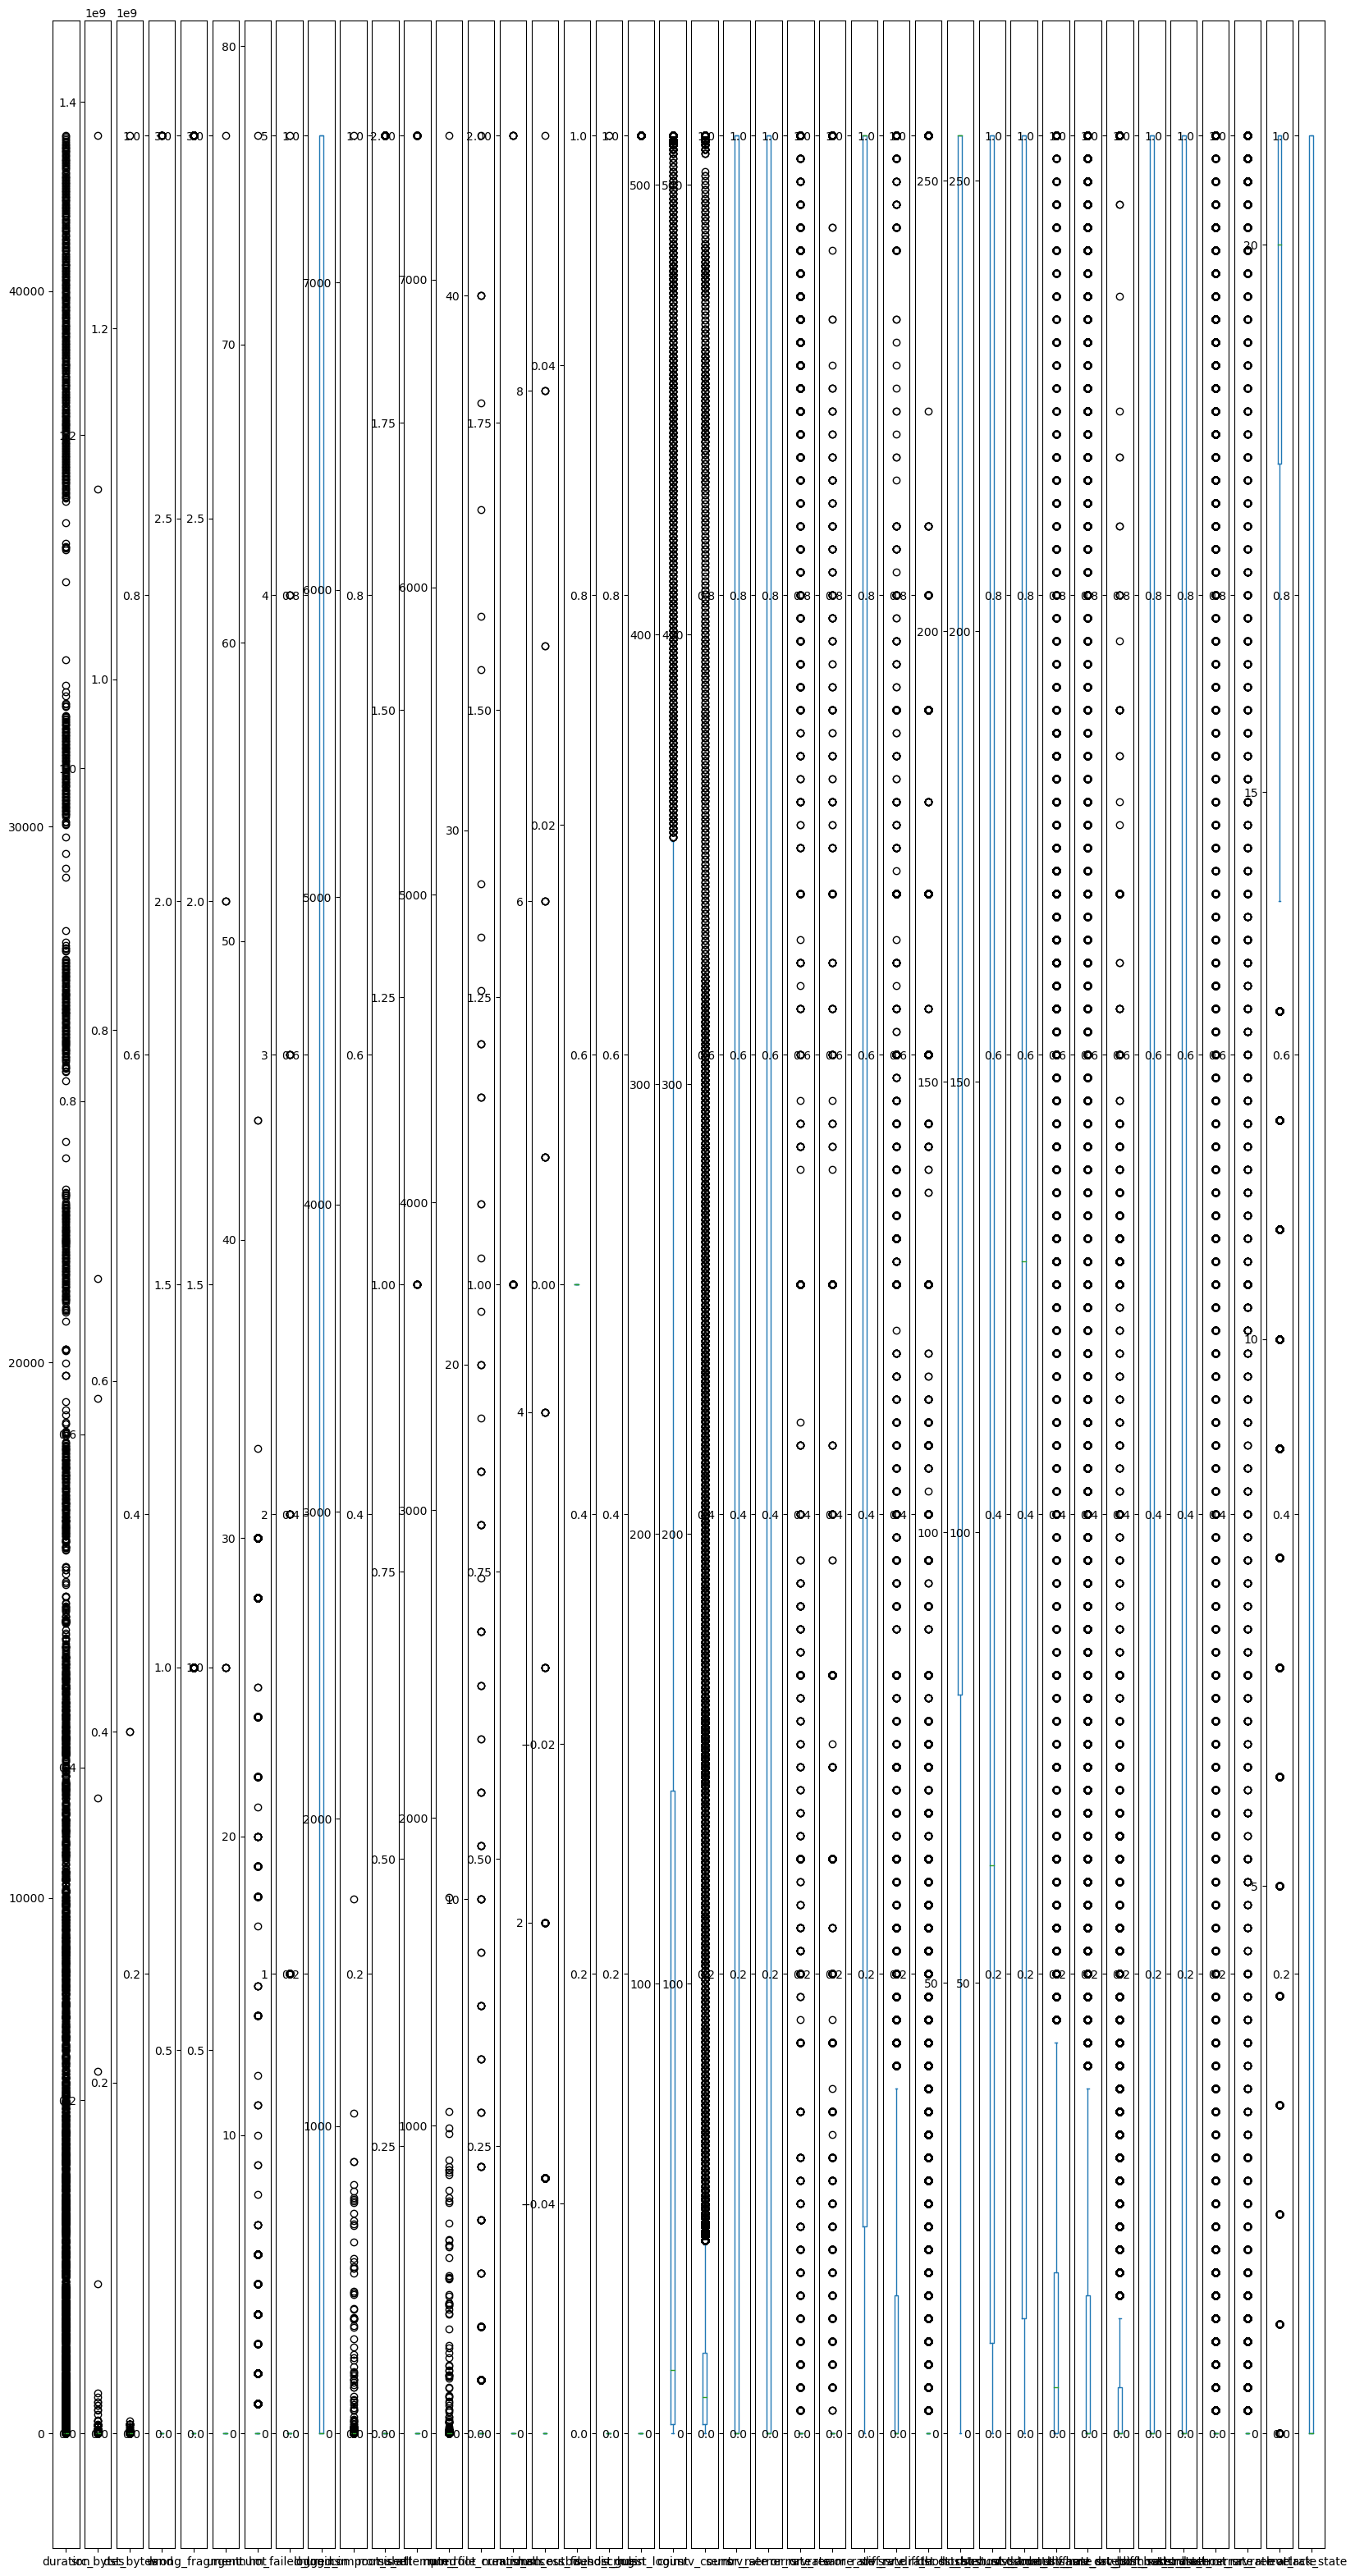

In [19]:
#Trained_Data.plot(kind='box',subplots=1,layout=(8,5),figsize=(20,40))
#plt.show()

Trained_Data.plot(kind='box', subplots=True, figsize=(20, 40))
plt.show()

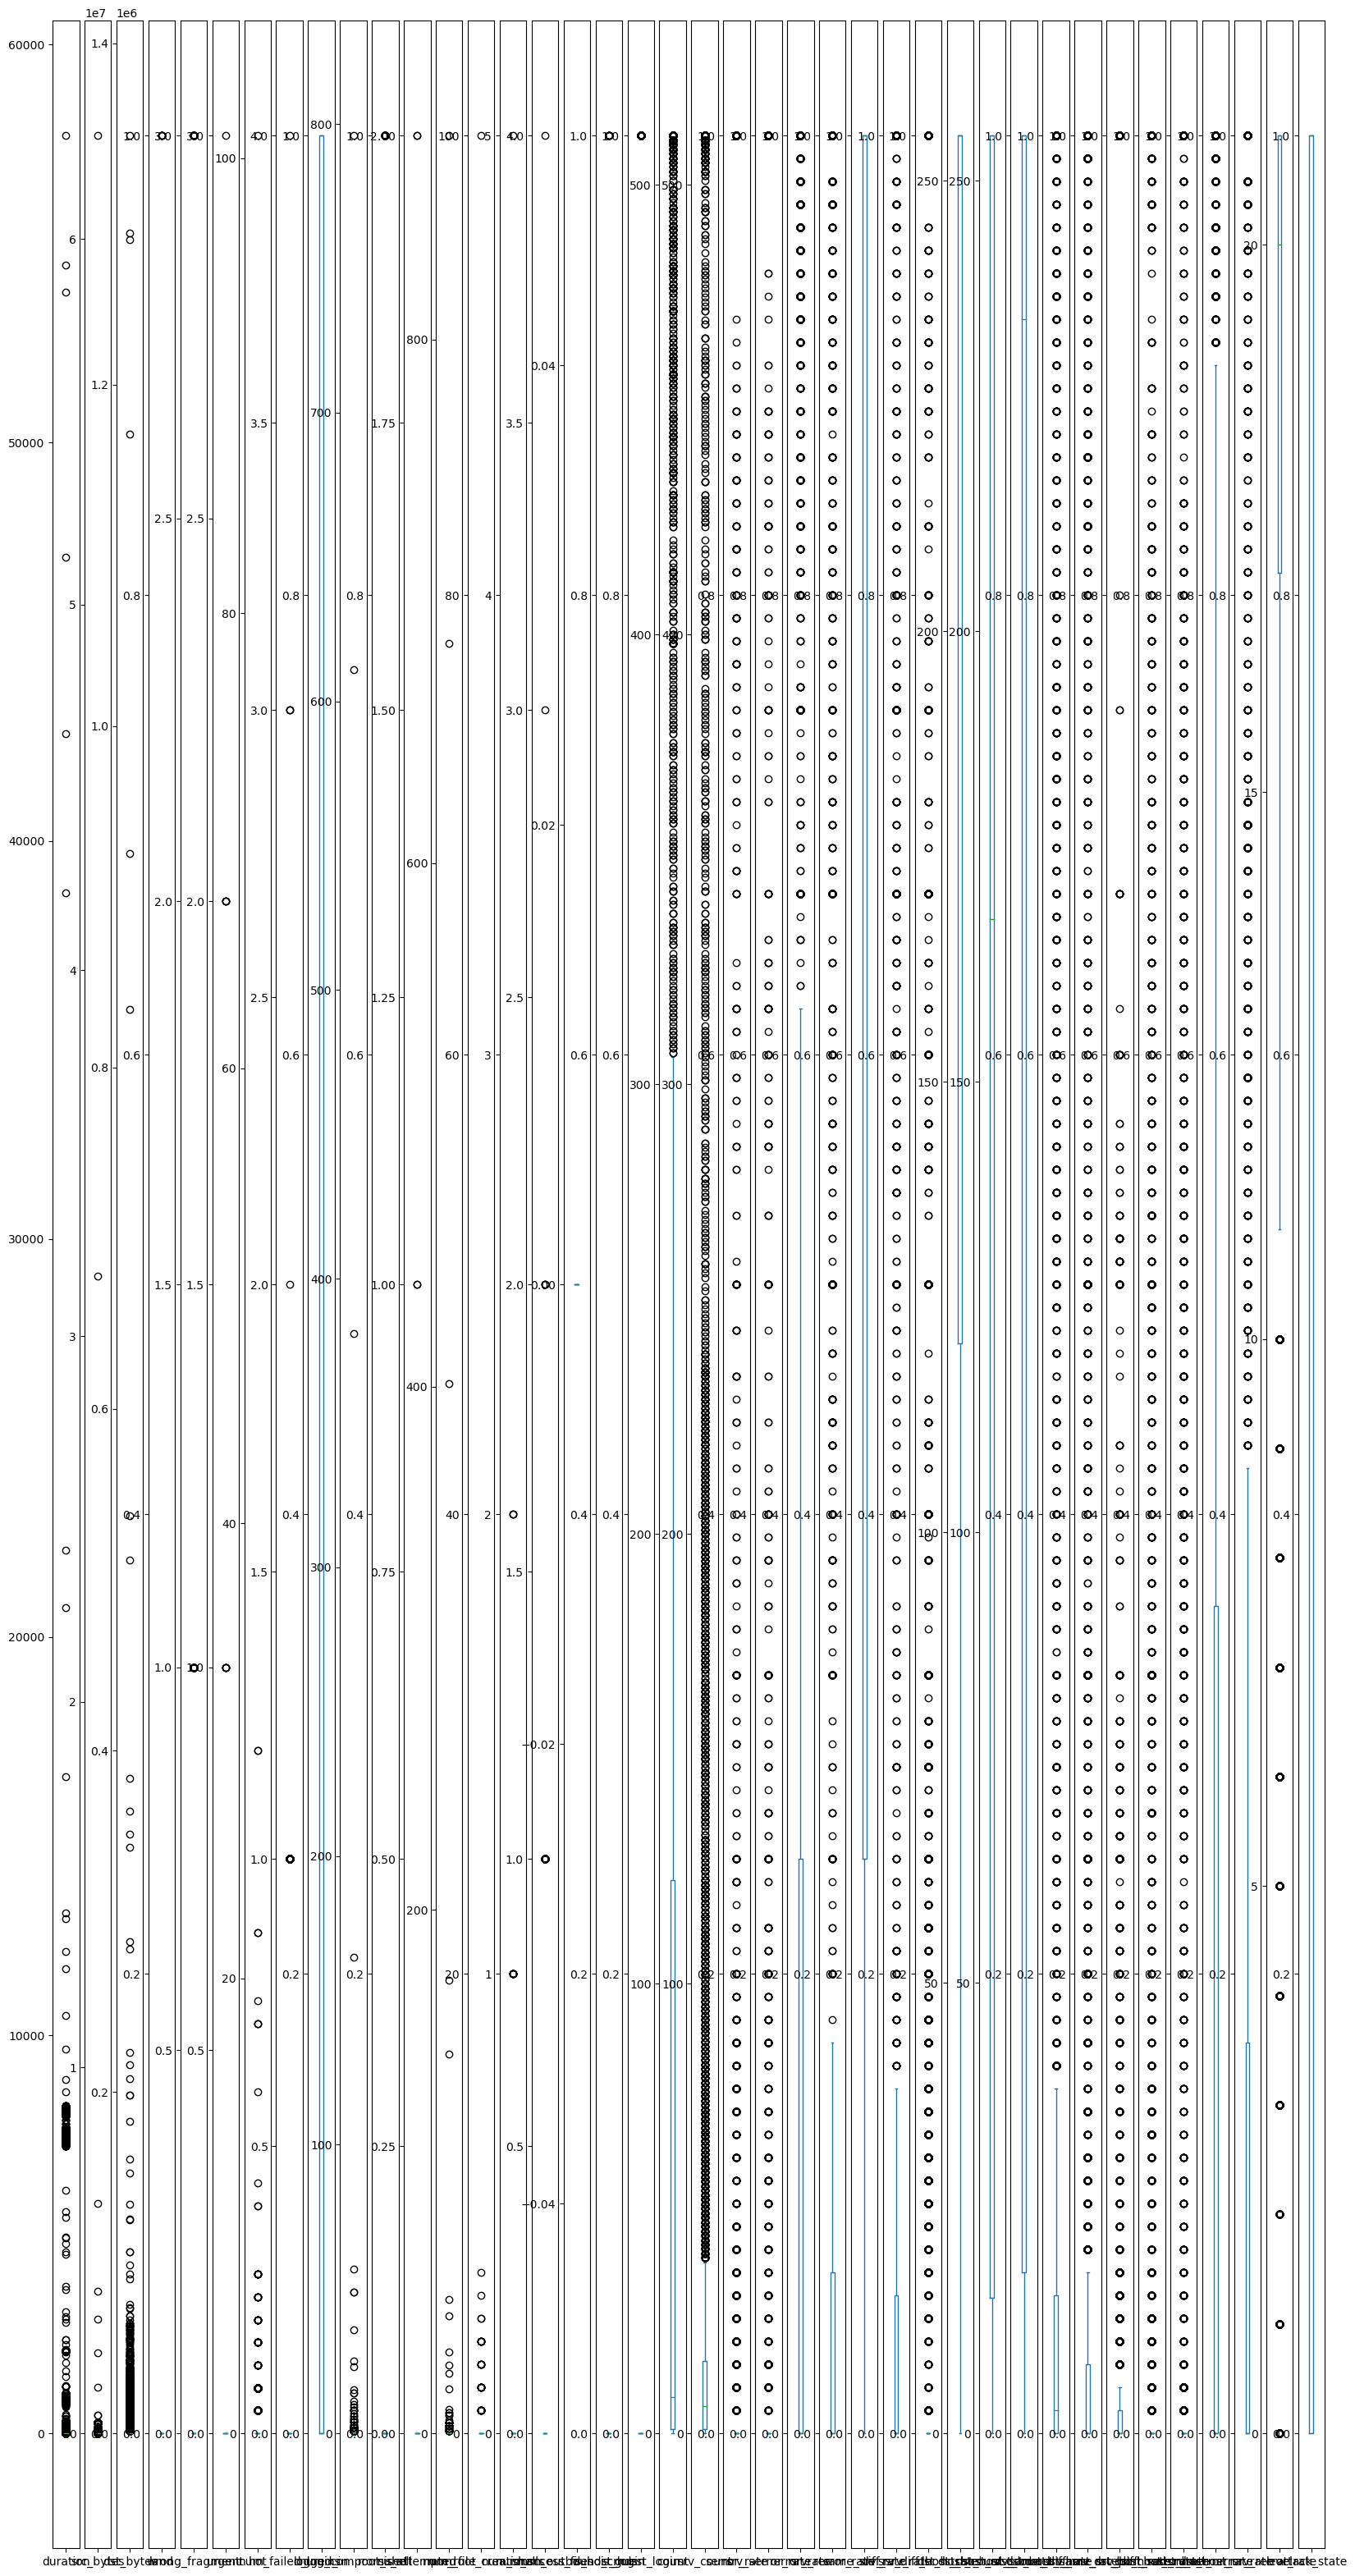

In [20]:
#Tested_Data.plot(kind='box',subplots=1,layout=(8,5),figsize=(20,40))
#plt.show()

Tested_Data.plot(kind='box', subplots=True, figsize=(20, 40))
plt.show()


In [21]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [22]:
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [23]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

# Data Splitting  

In [24]:
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('level', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('level', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [25]:
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

# Data Scaling 

In [26]:
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test= Ro_scaler.transform(X_test_test)

In [27]:
X_train_train.shape, Y_train_train.shape

((94479, 124), (94479,))

In [28]:
X_test_train.shape, Y_test_train.shape

((31493, 124), (31493,))

In [29]:
X_train_test.shape, Y_train_test.shape
X_test_test.shape, Y_test_test.shape

((5636, 118), (5636,))

# Integrating Trained Data

In [30]:
A = sm.add_constant(X_train)
Est1 = sm.GLM(Y_train, A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:               125972
Model:                            GLM   Df Residuals:                   125852
Model Family:                Gaussian   Df Model:                          119
Link Function:               identity   Scale:                        0.021929
Method:                          IRLS   Log-Likelihood:                 61917.
Date:                Mon, 08 May 2023   Deviance:                       2759.8
Time:                        10:56:02   Pearson chi2:                 2.76e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9180      0.007    125.956      0.000       0.904       0.932
duration                    -4.783e-06      2e-07    -23.889      0.000   -5.18e-06   -4.39e-06
src_bytes                    1.217e-10   7.28e-11      1.672      0.094   -2.09e-11    2.64e-10
dst_bytes                   -1.499e-10   1.04e-10     -1.443      0.149   -3.53e-10    5.37e-11
land                           -0.3573      0.030    -11.833      0.000      -0.416      -0.298
wrong_fragment                  0.1395      0.002     68.164      0.000       0.135       0.144
urgent                         -0.0318      0.029     -1.078      0.281      -0.090       0.026
hot                             0.0125      0.000     32.250      0.000       0.012       0.013
num_failed_logins              -0.0524      0.010     -5.496      0.000      -0.071      -0.034
logged_in                       0.1497      0.003     45.118      0.000       0.143       0.156
num_compromised                 0.0030      0.001      5.775      0.000       0.002       0.004
root_shell                     -0.0419      0.015     -2.858      0.004      -0.071      -0.013
su_attempted                   -0.0386      0.015     -2.560      0.010      -0.068      -0.009
num_root                       -0.0030      0.001     -5.741      0.000      -0.004      -0.002
num_file_creations             -0.0119      0.001    -13.278      0.000      -0.014      -0.010
num_shells                     -0.1007      0.019     -5.281      0.000      -0.138      -0.063
num_access_files                0.0103      0.006      1.789      0.074      -0.001       0.022
num_outbound_cmds            3.146e-15   8.92e-16      3.525      0.000     1.4e-15     4.9e-15
is_host_login                  -0.3446      0.148     -2.326      0.020      -0.635      -0.054
is_guest_login                 -0.2940      0.011    -27.095      0.000      -0.315      -0.273
count                           0.0003   8.88e-06     30.633      0.000       0.000       0.000
srv_count                    8.915e-05   1.31e-05      6.816      0.000    6.35e-05       0.000
serror_rate                    -0.0660      0.010     -6.291      0.000      -0.087      -0.045
srv_serror_rate                 0.2799      0.011     24.504      0.000       0.258       0.302
rerror_rate                    -0.1146      0.011    -10.207      0.000      -0.137      -0.093
srv_rerror_rate                 0.5408      0.013     41.412      0.000       0.515       0.566
same_srv_rate                  -0.3671      0.004    -98.730      0.000      -0.374      -0.360
diff_srv_rate                  -0.1265      0.004    -33.960      0.000      -0.134      -0.119
srv_diff_host_rate              0.0579      0.002     27.740      0.000       0.054       0.062
dst_host_co

# Evaluating Function 

In [31]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)                      
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")
    plot_roc_curve(Model_Abb, X_test, Y_test)

# Grid Search Function  

In [32]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

# Logistic Regression 

In [33]:
LR= LogisticRegression()
LR.fit(X_train_train , Y_train_train)

C:\Users\Mba\.conda\envs\spyder\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)

(0.8580425279691783, 0.8581907090464548)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.858

The Logistic Regression Model Sensitvity = 0.857

The Logistic Regression Model Precision  = 0.844

The Logistic Regression Model F1 Score   = 0.85

The Logistic Regression Model Recall     = 0.857

--------------------------------------------------



C:\Users\Mba\.conda\envs\spyder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


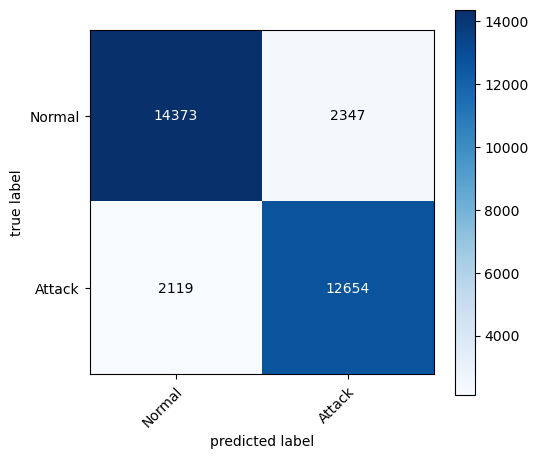

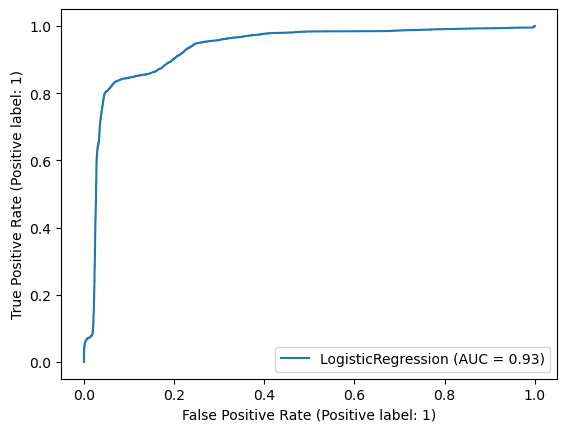

In [35]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)

# Decision Tree Classifier

In [36]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [37]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.9115888186792832, 0.9097259708506652)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.91

The Decision Tree Classifier Model Sensitvity = 0.808

The Decision Tree Classifier Model Precision  = 0.999

The Decision Tree Classifier Model F1 Score   = 0.894

The Decision Tree Classifier Model Recall     = 0.808

--------------------------------------------------



C:\Users\Mba\.conda\envs\spyder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


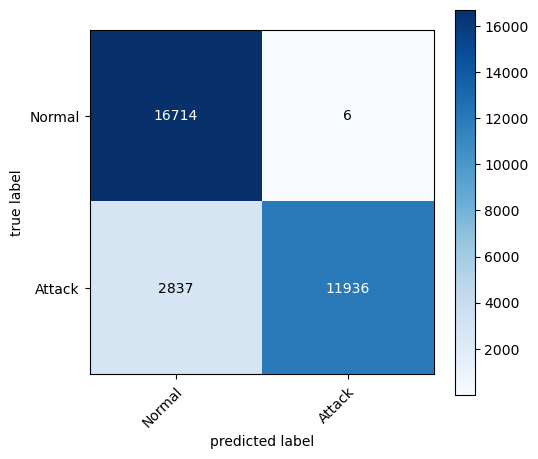

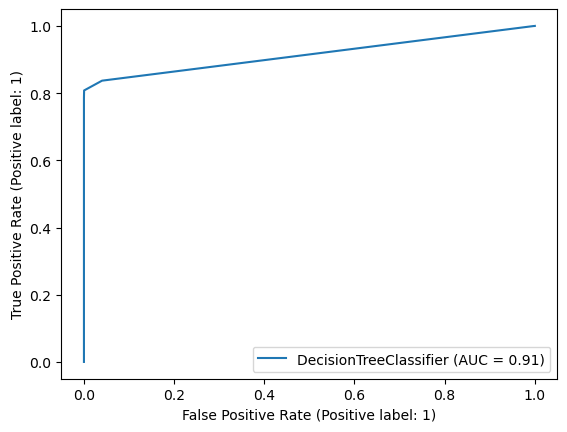

In [38]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

[Text(0.4583333333333333, 0.9, 'X[115] <= 0.5\ngini = 0.497\nsamples = 94479\nvalue = [50622, 43857]'),
 Text(0.16666666666666666, 0.7, 'X[38] <= -0.25\ngini = 0.497\nsamples = 93323\nvalue = [50461, 42862]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 34515\nvalue = [0, 34515]'),
 Text(0.25, 0.5, 'X[50] <= 0.5\ngini = 0.244\nsamples = 58808\nvalue = [50461, 8347]'),
 Text(0.16666666666666666, 0.3, 'X[87] <= 0.5\ngini = 0.243\nsamples = 58800\nvalue = [50461, 8339]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.222\nsamples = 55594\nvalue = [48522, 7072]'),
 Text(0.25, 0.1, 'gini = 0.478\nsamples = 3206\nvalue = [1939, 1267]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.7, 'X[56] <= 0.5\ngini = 0.24\nsamples = 1156\nvalue = [161, 995]'),
 Text(0.6666666666666666, 0.5, 'X[24] <= 0.835\ngini = 0.252\nsamples = 1088\nvalue = [161, 927]'),
 Text(0.5, 0.3, 'X[7] <= 0.5\ngini = 0.046\nsamples = 42\nvalue = [41, 1]'),
 Text(0.41666666666

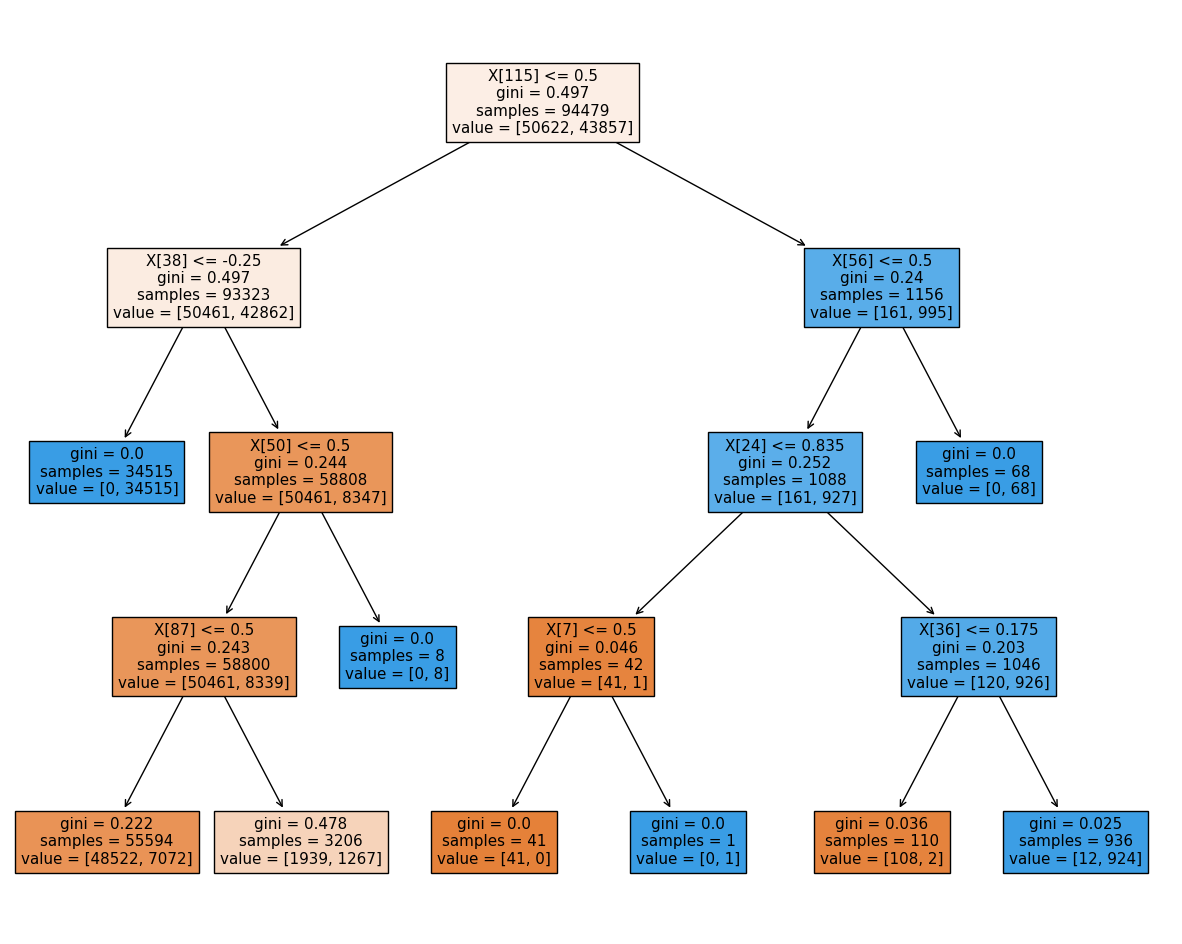

In [39]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

 # Random Forest Classifier¶

In [40]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [41]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=10)

In [42]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [43]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 1.0)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Sensitvity = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

The Random Forest Classifier Model Recall     = 1.0

--------------------------------------------------



C:\Users\Mba\.conda\envs\spyder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


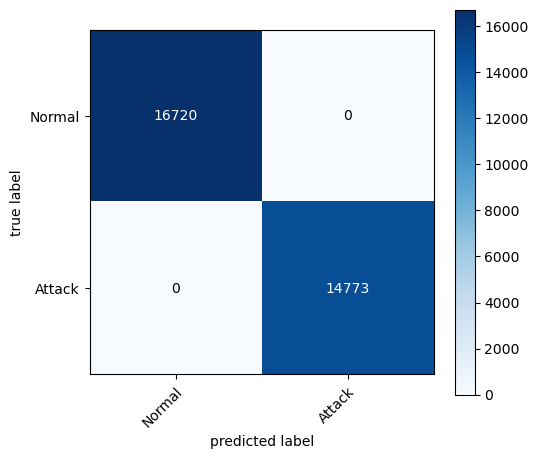

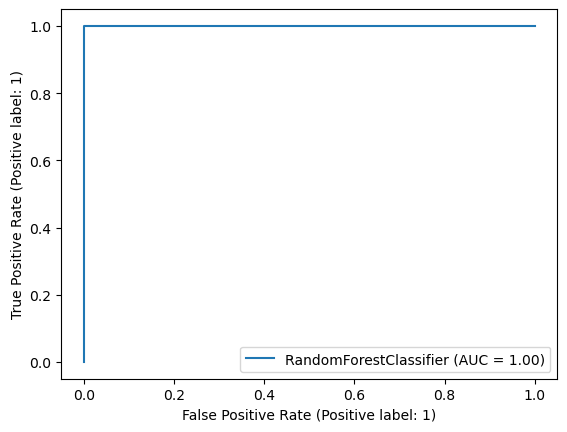

In [44]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

# K-Nearest Neighbors (KNN)  Classifier

In [45]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [46]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.9957556705722965, 0.9949195059219509)

--------------------------------------------------

The KNN Model Accuracy   = 0.995

The KNN Model Sensitvity = 0.993

The KNN Model Precision  = 0.996

The KNN Model F1 Score   = 0.995

The KNN Model Recall     = 0.993

--------------------------------------------------



C:\Users\Mba\.conda\envs\spyder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


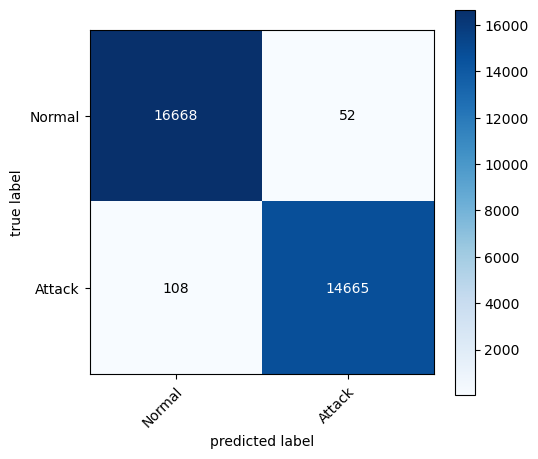

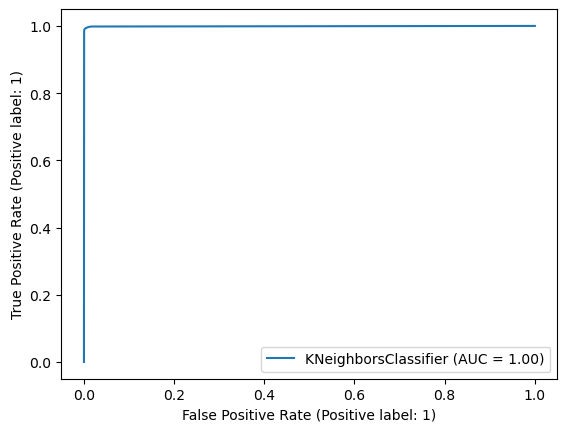

In [47]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

# SVM Classifier

In [48]:
#Linear_SVC = svm.LinearSVC(C=1)
#Linear_SVC.fit(X_train_train, Y_train_train)

In [49]:
#Linear_SVC.score(X_train_train, Y_train_train), Linear_SVC.score(X_test_train, Y_test_train)

In [50]:
#Evaluate('SVM Linear SVC Kernel', Linear_SVC, X_test_train, Y_test_train)

# DT-SVM Classifier Implementation 

# Decision Tree-Support Vector Machine (DT-SVM)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler

In [52]:
importances = DT.feature_importances_

In [53]:
# Instantiate RobustScaler object
Ro_scaler = RobustScaler()

# Scale training and testing data
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train = Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test = Ro_scaler.transform(X_test_test)

# Instantiate decision tree classifier with max_features=6 and max_depth=4
DT = DecisionTreeClassifier(max_features=6, max_depth=4)

# Fit decision tree to training data
DT.fit(X_train_train, Y_train_train)

# Calculate and print decision tree training and testing scores
DT_train_score = DT.score(X_train_train, Y_train_train)
DT_test_score = DT.score(X_test_train, Y_test_train)
print("Decision Tree training score: {:.2f}%".format(DT_train_score * 100))
print("Decision Tree testing score: {:.2f}%".format(DT_test_score * 100))

Decision Tree training score: 89.18%
Decision Tree testing score: 89.01%


In [54]:
# Instantiate feature selector object
selector = SelectFromModel(DT, threshold=0.3)

# Fit selector to training data
selector.fit(X_train_train, Y_train_train)

# Transform training and testing data to include only selected features
X_train_selected = selector.transform(X_train_train)
X_test_selected = selector.transform(X_test_train)

# Instantiate SVM classifier with default hyperparameters
svm = SVC()

# Fit SVM to training data
svm.fit(X_train_selected, Y_train_train)

SVC()

In [55]:
# Evaluate the performance of the SVM classifier on the test set
#svm_score = svm.score(X_test_selected, Y_test_test)
svm_score = svm.score(X_test_selected, Y_test_train)
print("SVM classifier accuracy: {:.2f}%".format(svm_score * 100))

SVM classifier accuracy: 81.52%


# SVM Visualization 

In [58]:
import numpy as np
from sklearn.svm import SVC

# generate sample data
X = np.random.rand(100, 1)
y = np.random.randint(0, 2, size=100)

# create and train the SVM model
svc = SVC(kernel='linear')
svc.fit(X, y)


# create a new data point with 1 feature
new_data_point = np.array([0.5])

# reshape the data point to have 2 dimensions
new_data_point_2d = new_data_point.reshape(1, -1)

# make a prediction using the reshaped data point
prediction = svc.predict(new_data_point_2d)

# Tunning Hyperparameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import RobustScaler

# Create pipeline with feature selection, scaling, and classification
pipe = Pipeline([
    ('selector', SelectFromModel(DecisionTreeClassifier(random_state=42))),
    ('scaler', RobustScaler()),
    ('classifier', SVC())
])

# Define hyperparameter grid for the decision tree
DT_param_grid = {
    'selector__estimator__max_depth': [3, 4, 5, 6, 7],
    'selector__estimator__max_features': [3, 4, 5, 6, 7]
}

# Define hyperparameter grid for the SVM
svm_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1]
}

# Perform grid search with cross-validation for decision tree and SVM
DT_grid = GridSearchCV(pipe, param_grid=DT_param_grid, cv=5)
svm_grid = GridSearchCV(pipe, param_grid=svm_param_grid, cv=5)

# Fit the models to the training data
DT_grid.fit(X_train_train, Y_train_train)
svm_grid.fit(X_train_train, Y_train_train)

# Print the best parameters and score for the decision tree and SVM
print("Best parameters for decision tree:", DT_grid.best_params_)
print("Best decision tree score:", DT_grid.best_score_)
print("Best parameters for SVM:", svm_grid.best_params_)
print("Best SVM score:", svm_grid.best_score_)

# Evaluate the performance of the best decision tree and SVM models on the test set
DT_score = DT_grid.score(X_test_train, Y_test_train)
svm_score = svm_grid.score(X_test_train, Y_test_train)
print("Decision tree accuracy on test set:", DT_score)
print("SVM accuracy on test set:", svm_score)